## Load the dataset

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming your file is in CSV format. If it's a TXT file, you might need to adjust the separator.
normalized_data_path = '../Normalization/A1-turbine-normalized.csv'
data = pd.read_csv(normalized_data_path, sep=',', header=0)

print(data.head())


   Height over Sea Level    Fall 1    Fall 2    Fall 3      Flow
0               1.458733  1.494763  1.565871 -1.363870 -0.920759
1              -0.889207 -0.864935 -0.908663  0.322233 -0.087759
2              -1.160123 -1.144520 -1.180093  0.322233 -0.250873
3               1.639344  1.637351  1.545514  1.165284  2.003763
4               0.736290  0.724040  0.742534  0.041216  0.473213


## Data Preprocessing

In [22]:
# Separate features and target variable
X = data.drop('Flow', axis=1)  
y = data['Flow']


# Split the dataset into training (85%) and testing (15%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Display the shape of the train and test sets to verify the split
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (382, 4) (382,)
Testing set shape: (68, 4) (68,)


## Model Training

In [23]:
# Initialize the Linear Regression model
mlr_model = LinearRegression()

# Fit the model to the training data
mlr_model.fit(X_train, y_train)

# Display the coefficients of the model
print("Coefficients:", mlr_model.coef_)
print("Intercept:", mlr_model.intercept_)


Coefficients: [-6.85208295 -0.9457851   8.23593419  1.51300795]
Intercept: -0.000675077122089026


## Model Evaluation

In [24]:
# Make predictions on the testing set
y_pred = mlr_model.predict(X_test)

# Calculate and print the metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


Mean Squared Error: 0.025375673626889517
R^2 Score: 0.9775181996669711


## Visualization

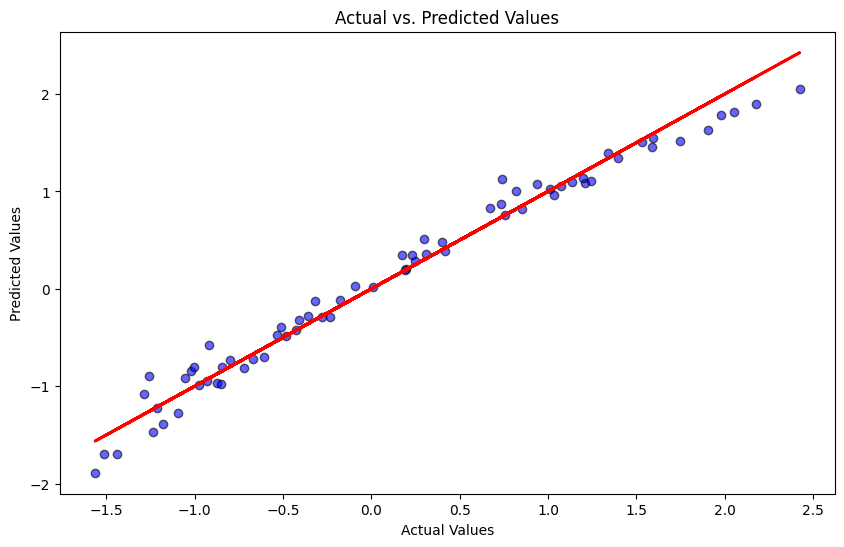

In [25]:
import matplotlib.pyplot as plt

# Plotting actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.6)
plt.plot(y_test, y_test, color='red', linewidth=2)  # Line for perfect predictions
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()
